# Task 2

В этом упражнении вы будете реализовывать линейную регрессию с одной
переменной, чтобы предсказать прибыль для продовольственного грузовика. Предположим, вы являетесь генеральным директором сети ресторанов с франшизой и хотите понять, где открыть новые заведения. Сеть ресторанов уже имеет грузовики в разных городах, и у вас есть данные о прибыли населения в городах.
Вы хотели бы использовать эти данные, чтобы помочь вам выбрать, на какой город расшириться в ближайшем будущем.

Файл "ex1data1.csv" содержит набор данных для нашей задачи линейной регрессии. 

Первый столбец - население города в 10 000 людей, то есть значение в данной колонке 17.592 означает, что в городе живёт 6.1101 * 10000 = 61 101 людей.

Второй столбец - средняя прибыль продовольственного грузовика в месяц в этом городе в $1000 , то есть 17.592 * 1000 = $17 592 прибыли. Отрицательное значение для прибыли указывает на потери в этом городе, то есть еды привезли больше, чем продали в ресторане.

Задача похожа на ту, что мы разбирали на лекции, только с дополнениями.

Можно перенести необходимый код из лекционного ноутбука в отдельный .py файл или несколько и импортировать оттуда либо просто скопировать в новый ноутбук.

Что предстоит сделать:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

1. Считать данные в pandas dataframe (1 балл).

In [3]:
data = pd.read_csv('ex1data1.csv')
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


2. Построить scatter plot зависимости прибыли от кол-ва людей в городе (1 балл).

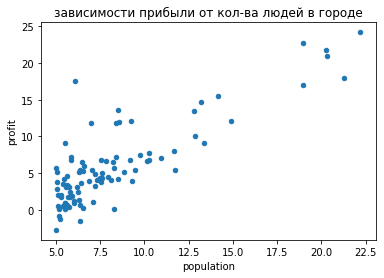

In [4]:
data.plot(kind='scatter', x='population', y='profit', title='зависимости прибыли от кол-ва людей в городе');

3. Найти матрицу Х и вектор у. Нормализировать данные. Добавить колонку единичек к матрице Х (1 балл).

In [7]:

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(data)

ones = np.array([1]*len(scaled)).reshape(-1,1)

scaled = np.hstack((ones, scaled))

X = scaled[:,[1,0]]
y = scaled[:,[2]].reshape((-1,1))

print('X',type(X),X.shape, X[:1])
print('y', type(y), y.shape, y[:1])

X <class 'numpy.ndarray'> (97, 2) [[0.06306437 1.        ]]
y <class 'numpy.ndarray'> (97, 1) [[0.75566299]]


4. Написать снова или найти в лекционном ноутбуке фукнции mserror, linear_prediction в матричной форме (то есть НЕ через циклы) (1 балл)

In [8]:
def linear_prediction(X, theta): 
    return np.dot(X, theta) 

# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    lp = linear_prediction(X, theta) 
    grad = np.dot(X.transpose(), (lp - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    lp = linear_prediction(X, theta) 
    J = np.dot((lp - y).transpose(), (lp - y)) 
    J /= 2
    return J[0] 


#https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

5. Найти коэффициенты линейной модели методами:
    1. Full batch gradient descent (5 баллов если коэффициенты получатся правильные)

[[1.25887488]]


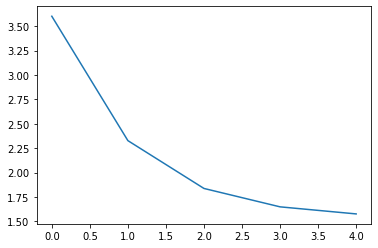

In [69]:
# function to perform full-batch gradient descent 
def fb_gradientDescent(X, y, max_iters): 
    theta = np.zeros((X.shape[1], 1))
    error_list = [] 
    for itr in range(max_iters): 
        theta = theta - gradient(X, y, theta)/max_iters
        error_list.append(cost(X, y, theta)) 
    return theta, error_list


2. Mini batch gradient descent с размером батча 32 (5 баллов если коэффициенты получатся правильные)

[[1.17413827]]


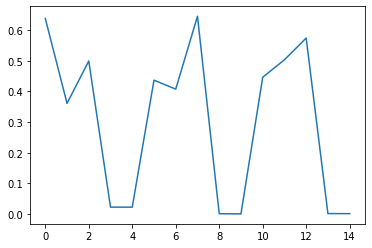

In [62]:
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def mb_gradientDescent(X, y, batch_size, max_iters): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - gradient(X_mini, y_mini, theta) / max_iters
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

mb_X = X[:,[0]]
mb_y = y

mb_theta, mb_error_list = mb_gradientDescent(mb_X, mb_y, 32, 3) 
print(mb_theta)

plt.plot(range(len(mb_error_list)), mb_error_list)

3. Stochastic gradient descent (1 балл если коэффициенты получатся правильные - потому что это уже делали на лекции)

In [65]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


sgd_x = X
sgd_y = y.ravel()

Model = linear_model.SGDRegressor(alpha = 0.0001, shuffle=True, max_iter = 1000)
Model.fit(sgd_x,sgd_y)
y_predicted = Model.predict(sgd_x)

sgd_mse = mean_squared_error(sgd_y, y_predicted)
print("RMSE: ", sqrt(sgd_mse))

[0.3040124  0.30053895 0.31837676 0.30933887 0.3025196  0.31756745
 0.31216105 0.31873162 0.30625547 0.29771737 0.30163037 0.35204609
 0.30176933 0.31771953 0.30121289 0.29965448 0.30553502 0.29816765
 0.30591791 0.30974204 0.30448356 0.38846246 0.3003147  0.30530063
 0.30076081 0.38056012 0.34407815 0.33291945 0.34615363 0.39999092
 0.29889705 0.30687096 0.32272812 0.30271045 0.31654283 0.31488661
 0.31585577 0.30100772 0.34412586 0.30546345 0.2998185  0.30861902
 0.33739844 0.3020061  0.31423832 0.30987504 0.29781041 0.3021713
 0.33735073 0.30062185 0.31254156 0.29922686 0.31184794 0.3129167
 0.30534059 0.30549625 0.3049911  0.30120692 0.32309789 0.32395313
 0.32020653 0.29846108 0.39448016 0.35648333 0.38064361 0.31062114
 0.3170438  0.32861939 0.30037017 0.3888859  0.32802299 0.31131476
 0.30339274 0.31066706 0.29755216 0.30662345 0.31253202 0.29760942
 0.32884602 0.29803406 0.3017407  0.29851535 0.30547717 0.3258324
 0.3064326  0.31836842 0.32232257 0.30336769 0.30049541 0.297746


Для каждого метода (кол-во баллов - за правильную реализацию для каждого из трёх методов):

- самостоятельно выбрать количество эпох, обосновать выбор (1 балл). Количество эпох для разных моделей может быть разным, а может быть одинаковым. Кол-во эпох можно выбирать из соображений времени на обучение (видим, что одна итерация занимает 2 секунды и понимаетм, что 10к итераций займут слишком много времени - значит надо бы поставить поменьше) или когда ошибка начинает меняться слишком незначительно, к примеру.

[[1.25887488]]


TypeError: text() missing 2 required positional arguments: 'y' and 's'

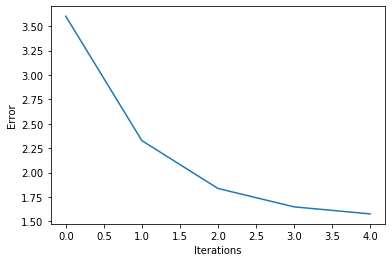

In [72]:
fb_X = X[:,[0]]
fb_y = y

fb_theta, fb_error_list = fb_gradientDescent(fb_X, fb_y, 5) 
print(fb_theta)
#print(fb_error_list)
plt.plot(range(len(fb_error_list)), fb_error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.text('Full Batch')


- вывести график ошибки в процессе обучения с подписями осей абсцисс и ординат  (1 балл)

 - измерить время обучения и провести анализ, какой из методов работает быстрее (5 баллов)

- вывести в ноутбуке полученные в результате применения метода коэффициенты (2 балла)

- вывести ошибку финальной модели (2 балла)

6. Построить аналогичную предыдущим модель с использованием sklearn.linear_model.LinearRegression . Подумать, какие данные подать на вход и исходя из документации, какие параметры обучения выбрать (10 баллов).

7. Сравнить качество четырёх моделей и написать, какая - лучшая.

Итого, максимальный балл - 1+1+1+1+5+5+1+3*(1+1+5+2+2)+10 = 58

В LMS пойдёт эта оценка заскейленная в промедуток от 1 до 10 и округлённая. 

Все комментарии к заданиям писать в Jupyter Notebook.

Финальный Jupyter Notebook с этим заданием нужно загрузить на github в публичный репозиторий и в качестве результата выполнения данного задания - скинуть ссылку в комментарии к заданию в LMS. 

Все вопросы - в слак. Желательно в общий чат, потому как если у вас есть вопрос, возможно он волнует не только вас. Глупых вопросов - нет, мы же учимся :)